# Week 2 - Counting Words & Phrases (Computational Linguistics)
This week, we take text corpora that we have developed, spidered, scraped, and encoded, and we find and count words, simple and parsed phrases and explore the statistical properties of those counts (e.g., word frequency distributions). Initially, we model how to search corpora for keywords or phrases. Next, we examine the distributions of terms and phrases across a corpus, and the correlation between different words and phrase counts. In order to do this effectively, we coarsely disambiguate words based of part-of-speech (POS) tagging, and normalize them through stemming and lemmatization. Next we distinguish *important* words and phrase within the corpus, and image them with Wordls! Then we calculate word frequenceis, conditional frequences (the frequency of word *shock* conditional on the presence of word *awe*), and statistically significant collocations of lengths 2 through $n$. Finally, we calculate and visualize Differences (Divergences and Distances) between the word frequency distributions from two corpora. 

Then we shift to focus not simply on the *ideas* in a corpus, but also extracting precise *claims*. This process involves a sequential pipeline of classifying and structuring tokens from text, each of which generates potentially useful data for the content analyst. Steps in this process, which we examine in this notebook, include: 1) tagging words by their part of speech (POS) to reveal the linguistic role they play in the sentence (e.g., Verb, Noun, Adjective, etc.); 2) tagging words as named entities (NER) such as places or organizations; 3) structuring or "parsing" sentences into nested phrases that are local to, describe or depend on one another; and 4) extracting informational claims from those phrases.

We will be introducing spaCy as a package for Computational Linguistics, and also walk you through how to use the Davies Corpora. 

While we wish to avoid using NLTK for heavy corpus analysis, some of its smaller functions can still be useful.

Of course, for final projects that draw on these tools, we encourage you to install the software on your own machines or shared servers at the university (RCC, SSRC) in order to perform these operations on much more text. 

For this notebook we will be using the following packages:


In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-asm9l9bv
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-asm9l9bv


## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </font>

In [ ]:
import pandas as pd
import seaborn as sns 
import nltk
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive 2/RAW_recipes.csv")

In [ ]:
text = []
for words in df["steps"]:
  text.append(words)

In [ ]:
Tokens = word_tokenize(re.sub(r'\\', '', str(text[:500])))
Tokens[:20]

['make',
 'a',
 'choice',
 'and',
 'proceed',
 'with',
 'recipe',
 'depending',
 'on',
 'size',
 'of',
 'squash',
 'cut',
 'into',
 'half',
 'or',
 'fourths',
 'remove',
 'seeds',
 'for']

In [ ]:
Text = nltk.Text(Tokens)
Index = nltk.text.ConcordanceIndex(Text) 
Index.print_concordance('bake')

Displaying 25 of 227 matches:
eason with sweet mexican spice mix bake at 350 degrees again depending on 
m and sides of a 12 inch pizza pan bake for 5 minutes until set but not br
r sausage and cheese 's p to taste bake 15 20 minutes or until eggs are se
"alouette evenly over potatoes and bake 15 minutes divide between plates g
the batter into prepared loaf pans bake for 45 to 55 minutes until the loa
rest over the ingredients stir and bake until all the water has evaporated
f add the next 5 cups of water and bake until all the water has evaporated
 spread potatoes onto baking sheet bake for 15 minutes toss and turn bake 
 bake for 15 minutes toss and turn bake for five minutes add herbs and tos
or five minutes add herbs and toss bake a final five minutes until the pot
d reserved 2 cups of batter on top bake for 50- 55 minutes or until browni
ixture to casserole dish cover and bake for 30 to 40 minutes or until bubb
sserole dish and top with croutons bake for 35 to 40 minutes or until 

In [ ]:
Text.common_contexts(['chicken'])

dip_pieces place_pieces coat_place of_on cover_pieces once_is
hot_stock smoked_beans smoked_on boneless_cooking meat_ham and_simmer
and_it and_toss the_on wash_and the_in the_and until_and
alternatively_meatballs


In [ ]:
Text.count('chicken')

136

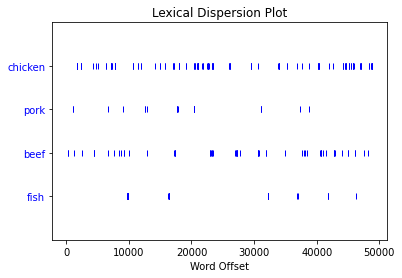

In [ ]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
Text.dispersion_plot(['chicken','pork', 'beef', 'fish'])
sns.set()

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</font>

In [ ]:
sample = df[:500]
sample

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
495,pancakes in a bowl,363904,3,1179823,2009-04-01,"['15-minutes-or-less', 'time-to-make', 'course...","[273.9, 15.0, 29.0, 27.0, 10.0, 12.0, 13.0]",4,['combine the bisquick heart smart and water o...,this is just a random recipe that i decided to...,"['bisquick', 'water', 'powdered sugar', 'syrup...",5
496,pantry raid chicken enchilada casserole,481157,60,204024,2012-06-18,"['60-minutes-or-less', 'time-to-make', 'course...","[524.6, 39.0, 47.0, 43.0, 61.0, 50.0, 14.0]",13,"['preheat the oven to 375 degrees f', 'grease ...",recipe is from allrecipes\r\nthis can be made ...,"['tomato sauce', 'water', 'taco seasoning mix'...",12
497,payday candy bar squares,18719,10,27643,2002-02-02,"['15-minutes-or-less', 'time-to-make', 'course...","[310.6, 31.0, 72.0, 12.0, 21.0, 25.0, 8.0]",8,['put half the peanuts in lightly greased 11x7...,just like a payday candy bar. my family eats t...,"['salted peanuts', 'butter', 'peanut butter ch...",5
498,peanut butter jam sandwich muffins,335539,30,883095,2008-11-06,"['30-minutes-or-less', 'time-to-make', 'course...","[286.9, 27.0, 53.0, 15.0, 16.0, 18.0, 8.0]",17,"['preheat oven to 400f', 'beat egg , 1 cup pea...",these are the a different muffin that will be ...,"['egg', 'smooth peanut butter', 'oil', 'brown ...",10


In [ ]:
def formatting(x):
    x = re.sub(r'[^a-zA-Z]+', ' ', x)
    return x 

In [ ]:
sample["steps_tokens"] = sample['steps'].apply(lambda x: word_tokenize(formatting(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sample.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,steps_tokens
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,"[make, a, choice, and, proceed, with, recipe, ..."
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,"[preheat, oven, to, degrees, f, press, dough, ..."
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,"[brown, ground, beef, in, large, pot, add, cho..."
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,"[place, potatoes, in, a, large, pot, of, light..."
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,"[mix, all, ingredients, boil, for, hours, or, ..."


In [ ]:
countsDict = {}
for word in sample['steps_tokens'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)


In [ ]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'dressing':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq[:5]

['and', 'the', 'to', 'in', 'a']

In [ ]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [ ]:
sample['normalized_steps_tokens'] = sample['steps_tokens'].apply(lambda x: normalizeTokens(x))
sample['normalized_steps_tokens_count'] = sample['normalized_steps_tokens'].apply(lambda x: len(x))
sample.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,steps_tokens,normalized_steps_tokens,normalized_steps_tokens_count
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,"[make, a, choice, and, proceed, with, recipe, ...","[choice, proceed, recipe, depend, size, squash...",72
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,"[preheat, oven, to, degrees, f, press, dough, ...","[preheat, oven, degree, f, press, dough, side,...",44
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,"[brown, ground, beef, in, large, pot, add, cho...","[brown, ground, beef, large, pot, add, chop, o...",34
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,"[place, potatoes, in, a, large, pot, of, light...","[place, potato, large, pot, lightly, salt, wat...",59
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,"[mix, all, ingredients, boil, for, hours, or, ...","[mix, ingredient, boil, hour, thick, pour, jar...",25


In [ ]:
#word frequency distributions
freqdist = nltk.ConditionalFreqDist(((len(w), w) for w in sample['normalized_steps_tokens'].sum()))

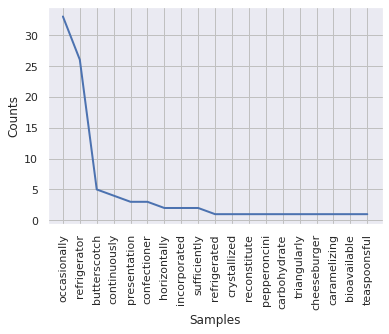

In [ ]:
freqdist[12].plot()

In [ ]:
probdist = nltk.ConditionalProbDist(freqdist, nltk.ELEProbDist)

In [ ]:
#print the most common 2 letter word
print(probdist[4].max())

#And its probability
print(probdist[4].prob(probdist[4].max()))

heat
0.05458654049855236


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_value = []
y_value = []
for i in range(1,10):
  x_value.append(probdist[i].max())
  y_value.append(probdist[i].prob(probdist[i].max()))

Text(0, 0.5, 'probability')

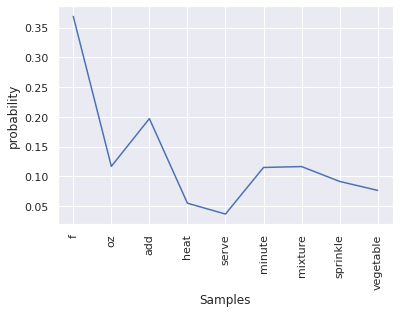

In [ ]:
plt.plot(x_value,y_value)
plt.xticks(rotation = 90)
plt.xlabel("Samples")
plt.ylabel("probability")

In [ ]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [ ]:
sample['normalized_tokens_POS'] = [spacy_pos(t) for t in sample['steps']]
sample['normalized_tokens_POS'].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [([, -LRB-), (', ``), (make, VB), (a, DT), (ch...
1    [([, -LRB-), (', ``), (preheat, NN), (oven, VB...
2    [([, -LRB-), (', POS), (brown, JJ), (ground, N...
3    [([, -LRB-), (', POS), (place, NN), (potatoes,...
4    [([, -LRB-), (', ``), (mix, VB), (all, DT), (i...
Name: normalized_tokens_POS, dtype: object

In [ ]:
freqdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in sample['normalized_tokens_POS'].sum())

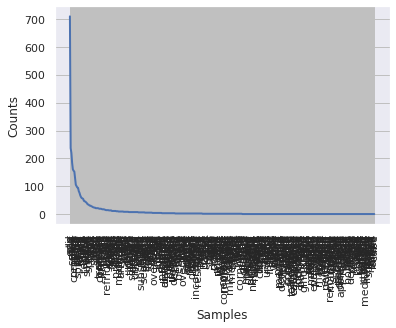

In [ ]:
freqdist_POStoWord ['VB'].plot()

In [ ]:
freqdist_POStoWord['VB'].most_common(10)

[('add', 709),
 ('stir', 237),
 ('mix', 220),
 ('cook', 184),
 ('serve', 161),
 ('remove', 156),
 ('combine', 153),
 ('pour', 130),
 ('let', 106),
 ('be', 101)]

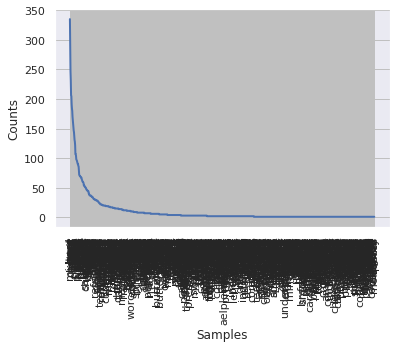

In [ ]:
freqdist_POStoWord ['NN'].plot()

In [ ]:
freqdist_POStoWord['NN'].most_common(10)

[('heat', 335),
 ('mixture', 284),
 ('bowl', 247),
 ('butter', 231),
 ('pan', 206),
 ('cheese', 205),
 ('salt', 191),
 ('sauce', 184),
 ('water', 180),
 ('oil', 170)]

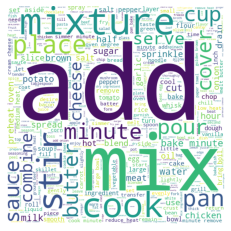

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(sample['normalized_steps_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("word_cloud.pdf", format = 'pdf')

As expected, the words that show up most frequently in the steps of recipes belong to the verb category (e.g. add, mix, etc.). The next most frequent words are the tools (e.g. pan, cup, etc.) and ingredients (e.g. sauce, butter, etc.) that are commonly used in cooking. 

## <font color="red">Exercise 3</font>

<font color="red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [ ]:
sample2 = df[:100]
sample2.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
sentences = []
for _ in sample2['description'].values:
  sentences.append(_)

In [ ]:
sentences[:10]

['autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.',
 'this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.',
 "this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.",
 'this is a super easy, great tasting, make ahead side dish that looks like you spent a lot more time preparing than you actually do. plus, most everything is done in advance. the times do not reflect the standing time of the potatoes.',
 "my dh's amish mother raised him on this recipe. he much prefers it over 

In [ ]:
doc = nlp(str(sentences))

In [ ]:
pos_sents = []
for sent in doc.sents:
    pos_sent = []
    for token in sent:
        pos_sent.append((token.text, token.tag_))
    pos_sents.append(pos_sent)

In [ ]:
sents = []
for i in pos_sents:
  for j in i:
    sents.append(j)

In [ ]:
sents[:10]

[('[', '-LRB-'),
 ("'", '``'),
 ('autumn', 'NN'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('favorite', 'JJ'),
 ('time', 'NN'),
 ('of', 'IN'),
 ('year', 'NN'),
 ('to', 'TO')]

In [ ]:
countTarget = 'NN'
targetCounts = {}
for ent, kind in sents:
  if kind != countTarget:
      continue
  elif ent in targetCounts:
      targetCounts[ent] += 1
  else:
      targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('recipe', 38),
 ('time', 25),
 ('food', 9),
 ('chicken', 9),
 ('dish', 8),
 ('cake', 8),
 ('husband', 7),
 ('meat', 7),
 ('one', 7),
 ('day', 6),
 ('cookbook', 6),
 ('sauce', 6),
 ('dinner', 6),
 ('cream', 6),
 ('mother', 5),
 ('family', 5),
 ('beef', 4),
 ('flavor', 4),
 ('chocolate', 4),
 ('version', 3)]

**Based on the list of nouns returned, we can learn that chicken and beef are the most popular meat to cook, and the main purpose of learning the recipes is to cook meals that can share with the family.** 

In [ ]:
countTarget = 'JJ'
targetCounts = {}
for ent, kind in sents:
  if kind != countTarget:
      continue
  elif ent in targetCounts:
      targetCounts[ent] += 1
  else:
      targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('easy', 12),
 ('great', 11),
 ('good', 11),
 ('favorite', 9),
 ('hot', 7),
 ('tasty', 7),
 ('little', 7),
 ('different', 7),
 ('wonderful', 7),
 ('delicious', 7),
 ('nice', 7),
 ('italian', 5),
 ('several', 5),
 ('sweet', 4),
 ('cold', 4),
 ('sure', 4),
 ('many', 4),
 ('other', 4),
 ('enough', 4),
 ('spicy', 3)]

In [ ]:
NTarget = 'JJ'
Word = 'recipe'
NResults = set()

for (ent1, kind1),(ent2,kind2) in zip(sents[:-1], sents[1:]):
  if (kind1,ent2.lower())==(NTarget,Word):
      NResults.add(ent1)
  else:
      continue

print(NResults) 

{'easy', 'simple', 'original'}


**We see a lot of positive adjectives (e.g. great, tasty, delicious, etc.)returned, meaning the receipes are awesome. In addition, they are also easy to learn according to the adjectives associated with the word "recipe".**  

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<font color="red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</font> 

In [ ]:
sample3 = df[:500]

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
nlp = spacy.load("en")

In [ ]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [ ]:
def formatting(x):
    x = re.sub(r'[^a-zA-Z]+', ' ', x)
    x = re.sub(r'[^\w\s]','',x)
    return x 

In [ ]:
def non_stopwords(word_list):
  word_filtered = []
  for w in word_list:
    if w not in stops:
        word_filtered.append(w)
  
  return word_filtered

In [ ]:
sample3.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
sample3["tokens"] = sample3['description'].apply(lambda x: word_tokenize(formatting(str(x))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sample3["tokens"] = sample3['tokens'].apply(lambda x: non_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Bigrams = nltk.collocations.BigramCollocationFinder.from_words(sample3['tokens'].sum())
print("There are {} bigrams in the finder".format(Bigrams.N))

There are 11077 bigrams in the finder


In [ ]:
def bigramScoring(count, wordsTuple, total):
    return count

print(Bigrams.nbest(bigramScoring, 10))

[('easy', 'make'), ('got', 'recipe'), ('years', 'ago'), ('prep', 'time'), ('ice', 'cream'), ('recipe', 'one'), ('comfort', 'food'), ('cook', 'time'), ('found', 'recipe'), ('side', 'dish')]


In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
Bigrams.score_ngrams(bigram_measures.student_t)[:40]

[(('easy', 'make'), 3.798907646474677),
 (('years', 'ago'), 3.593532854673698),
 (('prep', 'time'), 3.4312389858406473),
 (('got', 'recipe'), 3.328827136767536),
 (('ice', 'cream'), 3.3035593894889805),
 (('comfort', 'food'), 2.990069513406157),
 (('side', 'dish'), 2.9773705275194846),
 (('cook', 'time'), 2.927025969727062),
 (('whipped', 'cream'), 2.814383295924213),
 (('hope', 'enjoy'), 2.8105531607909464),
 (('time', 'includes'), 2.8005628916516763),
 (('found', 'recipe'), 2.676657338027745),
 (('low', 'fat'), 2.6391999723611717),
 (('feel', 'free'), 2.638244568800256),
 (('put', 'together'), 2.6337405234416558),
 (('even', 'better'), 2.6034405819383433),
 (('recipe', 'came'), 2.5540617780332004),
 (('tastes', 'like'), 2.544410290496079),
 (('used', 'make'), 2.4891333701859812),
 (('original', 'recipe'), 2.4886215468497768),
 (('sour', 'cream'), 2.439170204882133),
 (('cream', 'cheese'), 2.3993662729781),
 (('recipe', 'comes'), 2.325028744598068),
 (('recipe', 'one'), 2.312142547392

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(sample3['tokens'].sum())
Trigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('prep', 'time', 'includes'), 2.645716351640904),
 (('several', 'years', 'ago'), 1.7320259631419395),
 (('best', 'ever', 'tasted'), 1.7319996176975407),
 (('hope', 'enjoy', 'much'), 1.7319691221045512),
 (('time', 'refrigeration', 'time'), 1.731873715740803),
 (('first', 'time', 'made'), 1.7312456787422708),
 (('edition', 'contest', 'entry'), 1.414213320331514),
 (('threw', 'bunch', 'stuff'), 1.4142128708257204),
 (('special', 'edition', 'contest'), 1.4142128362483517),
 (('homemade', 'v', 'juice'), 1.4142122945362419),
 (('artisan', 'bread', 'five'), 1.414211833504659),
 (('let', 'long', 'list'), 1.4142116260404465),
 (('cook', 'special', 'edition'), 1.414210969070441),
 (('chunks', 'tasty', 'crab'), 1.4142101046362228),
 (('big', 'chunks', 'tasty'), 1.4142097588625355),
 (('red', 'bell', 'pepper'), 1.4142094476662173),
 (('red', 'pepper', 'flakes'), 1.4142094476662173),
 (('ready', 'set', 'cook'), 1.4142083757677868),
 (('set', 'cook', 'special'), 1.4142083757677868),
 (('level', '

**These collocations don't seem to be idiomatic. The n-grams used standard English.**



## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [ ]:
sample5 = df[:500]

In [ ]:
descriptions = []
for _ in sample5['description'].values:
  descriptions.append(re.sub(r'[^a-zA-Z]+', ' ', str(_)))

In [ ]:
descriptions = nlp(str(descriptions))

In [ ]:
entity = []
for ent in descriptions.ents:
    entity.append((ent.text, ent.label_))

In [ ]:
entityCounts = {}

for ent, kind in entity:
    if kind in entityCounts:
        entityCounts[kind] += 1
    else:
        entityCounts[kind] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('PERSON', 125),
 ('NORP', 88),
 ('DATE', 84),
 ('GPE', 67),
 ('CARDINAL', 62),
 ('ORG', 59),
 ('TIME', 44),
 ('ORDINAL', 17),
 ('PRODUCT', 8),
 ('FAC', 8)]

In [ ]:
PERSONCounts = []
for ent, kind in entity:
    if kind == 'PERSON':
        PERSONCounts.append(ent)

In [ ]:
PERSONCounts[:20]

['mom s chili',
 "chef sam choy s cookbook '",
 "ann hodgman s '",
 'bush',
 'scott meskan george s',
 'mint brownie',
 'york peppermint',
 'noodles',
 'carrot cake',
 'stefan',
 'emily',
 'savoury basil oregano',
 'holland michigan',
 'yea',
 'macaroni salad',
 'kbyu s culinary creations',
 "mary crafts'",
 'don',
 'margarita',
 'bbq s potlucks']

In [ ]:
NORPCounts = []
for ent, kind in entity:
    if kind == 'NORP':
        NORPCounts.append(ent)

In [ ]:
NORPCounts[:20]

['mexican',
 'amish',
 'italian',
 'italian',
 'swiss',
 'mexican',
 'broccoli',
 'italian',
 'italian',
 'italian',
 'mexican',
 'vegetarian',
 'asian',
 'appetizer',
 'french',
 'appetizer',
 'indonesian',
 'mexican',
 'indian',
 'cantonese']

In [ ]:
spacy.explain("PERSON")

'People, including fictional'

Initially, I didn't expect the "person" category to appear most frequently. However, after taking a closer look, I realize that the person category includes things like the name of the recipes, the brand of ingredients, and the name of the cookbook authors. Thus, it makes sense to be the top 1 category. The next category is the "nationality", which indicates the various types of cuisine in the context. It seems that the corpus is pretty inclusive in terms of the cuisines included. 

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [ ]:
sample6 = df[:100]

In [ ]:
sample6.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
corpus = []
for _ in sample6['description'].values:
  corpus.append(re.sub(r'[^a-zA-Z]+', ' ', str(_)))

corpus = nlp(str(corpus))

In [ ]:
from spacy.symbols import nsubj, VERB

In [ ]:
verbs = set()
for possible_subject in corpus:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{says, s, tried, decided, tell, comes, meant, give, recommend, says, m, make, make, hope, feel, like, recognizes, like, watched, made, couldn, came, made, served, allows, sounds, loves, saw, found, visited, used, made, whipped, hold, eats, serve, raised, requested, s, slaved, liked, loves, hope, know, tasted, substitute, won, heat, love, tried, made, made, got, gives, cut, include, made, found, came, prefer, think, got, gave, put, enjoy, produces, takes, sounds, chopped, made, prove, s, loved, made, decided, uses, enjoyed, bake, works, tasted, s, loves, brought, fed, love, seem, loves, contains, found, made, hope, contains, use, like, could, disappoint, liked, love, decided, made, think, halve, apologize, depends, ask, loved, know, guessing, looks, make, started, threw, sounds, re, picked, get, think, works, calls, makes, get, seems, expecting, help, s, whip, makes, got, spent, prefers, reflects, couldn, find, say, used, going, getting, want, don, cut, knows, enjoy, works, passed, turn

In [ ]:
freq = {}
for chunk in corpus.noun_chunks:
  if chunk.root.head.text not in freq.keys():
    freq[chunk.root.head.text] = 1
  else:
    freq[chunk.root.head.text] += 1

In [ ]:
subj = []
obj = []
for chunk in corpus.noun_chunks:
        subject = 0
        object_ = 0

        if chunk.root.head.text == 'like':
          
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                subj.append(subject)
            if object_ is not 0:
                obj.append(object_)
  
print(subj,obj)

['i', 'i', 'you', 'you', 'kids'] ['them', 'it', 'cheesecake', 'it']


In [ ]:
subj = []
obj = []
for chunk in corpus.noun_chunks:
        subject = 0
        object_ = 0

        if chunk.root.head.text == 'made':
          
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                subj.append(subject)
            if object_ is not 0:
                obj.append(object_)

print(subj,obj)

['we', 'it', 'husband', 'brother', 'friend', 'sister', 'i', 've', 'i', 'i', 'i', 'i', 'i', 've', 'i', 'we', 'i'] ['pot', 'it', 'it', 'it', 'brownies', 'changes']


In [ ]:
subj = []
obj = []
for chunk in corpus.noun_chunks:
        subject = 0
        object_ = 0

        if chunk.root.head.text == 'visited':
          
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                subj.append(subject)
            if object_ is not 0:
                obj.append(object_)
print(subj,obj)        

['we'] ['restaurant']


In [ ]:
subj = []
obj = []
for chunk in corpus.noun_chunks:
        subject = 0
        object_ = 0

        if chunk.root.head.text == 'give':
          
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                subj.append(subject)
            if object_ is not 0:
                obj.append(object_)
print(subj,obj)

['i'] ['word', 'crunch']


In [ ]:
subj = []
obj = []
for chunk in corpus.noun_chunks:
        subject = 0
        object_ = 0

        if chunk.root.head.text == 'cook':
          
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                subj.append(subject)
            if object_ is not 0:
                obj.append(object_)
print(subj,obj)

['others'] ['recipe', 'meat', 'chicken']
